#### Measurement Framework Library
# MFLib API Examples: Prepare a Slice

Add the Measurement Node and Measurement Network while creating new slice.  
This notebook shows the process of creating a 3 node experiment with the needed Measurement Node and Measurement Network.  
The process of creating the sice is the same as creating any slice but after the topology has been set, MFLib needs to add the extra node and network before the slice is submitted. 

## General Imports

In [ ]:
import os
import json
import traceback

## Import MFLib
If you have trouble importing mflib it may be because:
* After you do the MFLib install, you will have to restart the notebook kernel before the importing of MFLib will work.
* When your Jupyter Hub server container is reloaded, the above install will may be removed. If you log out or have to restart the server you will get an import error when trying to import MFLib.
See [Install MFLib](./mflib_install.ipynb)


In [ ]:
import mflib 
print(f"MFLib version  {mflib.__version__} " )

from mflib.mflib import MFLib

## Setup Experiment Slice

### Import fablib

In [ ]:
#from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager

#try:
#    fablib = fablib_manager()
#                     
#     fablib.show_config()
# except Exception as e:
#     print(f"Exception: {e}")

In [ ]:
from fabrictestbed_extensions.fablib.fablib import fablib

### Set Slice Information

In [ ]:
%%time

slice_name = "MyMonitoredSlice"

# Sites without PTP + NCSA where meas node is located
#[site1,site2,site3] = fablib.get_random_sites(count=3, avoid=["DALL","GPN","LBNL","RENC","SALT","TACC","UKY","WASH","NCSA","LOSA","GATECH","INDI","NEWY","SRI"])

# Sites without PTP + NCSA where meas node is located + Problem sites
[site1,site2,site3] = fablib.get_random_sites(count=3, avoid=["DALL","GPN","LBNL","RENC","SALT","TACC","UKY","WASH","NCSA","LOSA","GATECH","INDI","MAX", "MASS","NEWY","SRI","UCSD"])


node1_name = 'Node1'
node2_name = 'Node2'
node3_name = 'Node3'

network1_name='net1'
network2_name='net2'
network3_name='net3'

node1_nic_name = 'nic1'
node2_nic_name = 'nic2'
node3_nic_name = 'nic3'

print(f"Setting up slice {slice_name}")
print(f"Using sites {site1}, {site2}, {site3}")

### Create Experiment Topology

In [ ]:
try:
    #Create Slice
    slice = fablib.new_slice(name=slice_name)
    
    # Node1
    node1 = slice.add_node(name=node1_name, site=site1)
    iface1 = node1.add_component(model='NIC_Basic', name=node1_nic_name).get_interfaces()[0]
    
    # Node2
    node2 = slice.add_node(name=node2_name, site=site2)
    iface2  = node2.add_component(model='NIC_Basic', name=node2_nic_name).get_interfaces()[0]

    # Node3
    node3 = slice.add_node(name=node3_name, site=site3)
    iface3  = node3.add_component(model='NIC_Basic', name=node3_nic_name).get_interfaces()[0]

    # NetworkS
    net1 = slice.add_l3network(name=network1_name, interfaces=[iface1], type='IPv4')
    net2 = slice.add_l3network(name=network2_name, interfaces=[iface2], type='IPv4')
    net3 = slice.add_l3network(name=network3_name, interfaces=[iface3], type='IPv4')
    
    print(f"Slice Topology Done.")
except Exception as e:
    print(f"Exception: {e}")

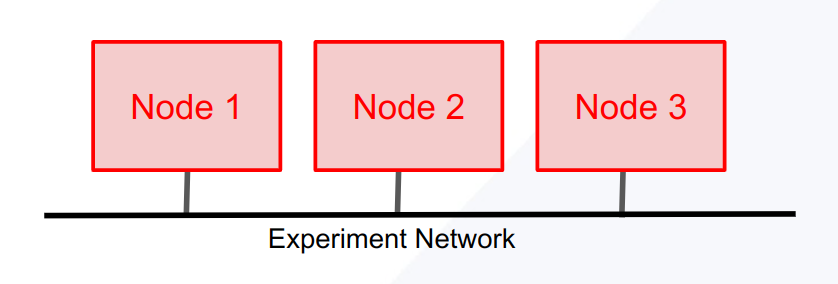

### Add measurement node to slice topology.
To add the Measurement Node and Measurement Network use the static method mflib.addMeasNode(slice), where slice is the fablib slice object.

In [ ]:
# Add measurement node to topology using static method.
MFLib.addMeasNode(slice, disk=100)
print("Done")

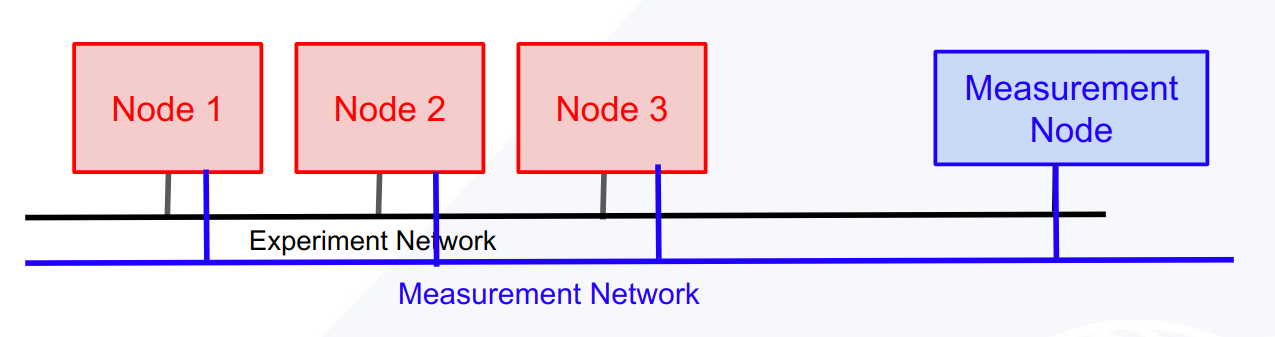

### Submit the Slice

In [ ]:
%%time
try:
    # Submit Slice Request
    print(f'Submitting the new slice, "{slice_name}"...')
    slice.submit()
    print(f'{slice_name} creation done.')

except Exception as e:
    print(f"Slice Fail: {e}")
    traceback.print_exc()

-----
# Slice Setup Is Complete  
The slice has now been created with the Measurement Node and the Measurement Network. The next step is to install the Measurement Framework for use. See [Instrumentize a Slice](./instrumentize_a_slice.ipynb)  
You may also use the below methods to get general slice information or extend the slice. 

-----